<a href="https://colab.research.google.com/github/xlnt415/StudyForBigdata/blob/main/Python/DeepLearning/TensorFlow/%EC%BA%A1%EC%8A%A4%ED%86%A4/%EC%95%8C%EC%95%BD%EB%B6%84%EB%A5%98(densenet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from PIL import Image

Image.MAX_IMAGE_PIXELS = None

## Dataset preprocessing

### Import project dependencies

In [3]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

%matplotlib inline

Mounted at /content/drive


### Seting up dataset paths

In [4]:
dataset_path_new = "/content/drive/MyDrive/캡스톤 데이터/data"

In [5]:
train_dir = os.path.join(dataset_path_new, 'train')
validation_dir = os.path.join(dataset_path_new, "val")

## Building the model

### Loading the pre-trained model (MobileNetV2)

In [6]:
IMG_SHAPE = (128, 128, 3)

In [7]:
from tensorflow.keras.applications import DenseNet121

In [8]:
base_model = DenseNet121(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")  #모델 다른 것도 불러오기(cnn추가)

29084464/29084464 [==============================] - 0s 0us/step


In [9]:
# base_model.summary()

### Freezing the base model

In [10]:
base_model.trainable = False

### Defining the custom head for our network

In [11]:
base_model.output

<KerasTensor: shape=(None, 4, 4, 1024) dtype=float32 (created by layer 'relu')>

In [12]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)

In [13]:
global_average_layer

<KerasTensor: shape=(None, 1024) dtype=float32 (created by layer 'global_average_pooling2d')>

In [14]:
prediction_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')(global_average_layer)
# prediction_layer = tf.keras.layers.Dense(units=2, activation='softmax')(global_average_layer)

### Defining the model

In [15]:
model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)

In [16]:
# model.summary()

### Compiling the model

In [17]:
# model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
 # 느리면 lr 올리기

### Creating Data Generators

Resizing images

    Big pre-trained architecture support only certain input sizes.

For example: MobileNet (architecture that we use) supports: (96, 96), (128, 128), (160, 160), (192, 192), (224, 224).

In [18]:
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_valid = ImageDataGenerator(rescale=1/255.)

In [19]:
# def preprocess_input(img_path):
#     try:
#         img = load_img(img_path, target_size=(128, 128))
#         # 이미지 전처리 작업 수행
#         return img
#     except:
        


# datagen = ImageDataGenerator(
#     preprocessing_function=preprocess_input,
#     rescale=1/255.
# )

In [20]:
while True:
    train_generator = data_gen_train.flow_from_directory(train_dir, target_size=(128,128),
                                                         batch_size=128, class_mode="binary")
    
    if len(train_generator.filepaths) > 20000:
        break
     

Found 0 images belonging to 2 classes.
Found 35536 images belonging to 2 classes.


In [21]:
# valid_generator = datagen.flow_from_directory(validation_dir, target_size=(128,128),
#                                                      batch_size= 32, class_mode="categorical")

In [22]:
# valid_generator = data_gen_valid.flow_from_directory(validation_dir, target_size=(128,128),
#                                                      batch_size= 128, class_mode="categorical") #batch 올려도 될듯
valid_generator = data_gen_valid.flow_from_directory(validation_dir, target_size=(128,128),
                                                     batch_size= 128, class_mode="binary") #batch 올려도 될듯

Found 8574 images belonging to 2 classes.


### Training the model

In [23]:
# hist = model.fit(train_generator, epochs=5, validation_data=valid_generator,  validation_steps=len(valid_generator), callbacks=[
#     ModelCheckpoint(filepath='/content/drive/MyDrive/캡스톤 데이터/save/mobilenet_sample.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy')
# ]) # save_weights_only=True 옵션이 지정되어 있기 때문에 모델의 가중치만 저장되고, 모델의 구조와 설정이 저장되지 않아서 발생하는 오류

hist = model.fit(train_generator, epochs=5, validation_data=valid_generator,  validation_steps=len(valid_generator))

Epoch 1/5
278/278 [==============================] - 5871s 21s/step - loss: 0.0997 - accuracy: 0.9634 - val_loss: 0.0497 - val_accuracy: 0.9834
Epoch 2/5
278/278 [==============================] - 319s 1s/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0516 - val_accuracy: 0.9850
Epoch 3/5
278/278 [==============================] - 319s 1s/step - loss: 0.0268 - accuracy: 0.9913 - val_loss: 0.0489 - val_accuracy: 0.9854
Epoch 4/5
278/278 [==============================] - 320s 1s/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0487 - val_accuracy: 0.9858
Epoch 5/5
278/278 [==============================] - 320s 1s/step - loss: 0.0209 - accuracy: 0.9932 - val_loss: 0.0509 - val_accuracy: 0.9859


### Transfer learning model evaluation

In [24]:
loss, accuracy = model.evaluate_generator(train_generator)

<ipython-input-24-78e6f2a89b6f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(train_generator)


In [25]:
valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)

<ipython-input-25-a86cc1f7f1e2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)


In [26]:
print("Accuracy : {}".format(accuracy))
print("loss : {}".format(loss))
print("vallid_accuracy: {}".format(valid_accuracy))
print("valid_loss : {}".format(valid_loss))

Accuracy : 0.9940060973167419
loss : 0.018618371337652206
vallid_accuracy: 0.9858875870704651
valid_loss : 0.05087008327245712


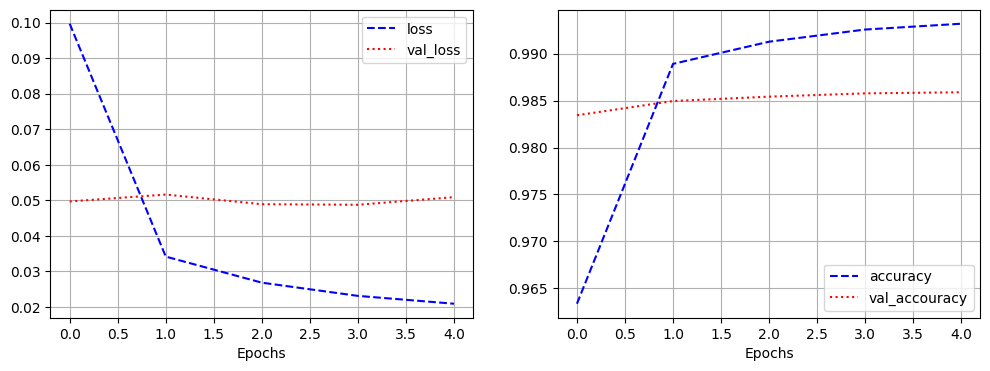

<Figure size 640x480 with 0 Axes>

In [27]:
hist.history.keys()

plt.figure(figsize = (12, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], 'b--', label = 'loss')
plt.plot(hist.history['val_loss'], 'r:', label = 'val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], 'b--', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], 'r:', label = 'val_accouracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()


plt.show()

plt.savefig('/content/drive/MyDrive/캡스톤 데이터/평가.png')

## Save

----

### Evaluating the fine tuned model

In [28]:
valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)

<ipython-input-28-a86cc1f7f1e2>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  valid_loss, valid_accuracy = model.evaluate_generator(valid_generator)


In [29]:
print("Validation accuracy after fine tuning: {}".format(valid_accuracy))

Validation accuracy after fine tuning: 0.9858875870704651


In [30]:
model.save('/content/drive/MyDrive/캡스톤 데이터/save/densenet.h5') #이렇게 저장할 것.

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

In [32]:
time.sleep(60)

# 모델 불러오기
model = tf.keras.models.load_model('/content/drive/MyDrive/캡스톤 데이터/save/densenet.h5')

In [33]:
test_data_dir = '/content/drive/MyDrive/캡스톤 데이터/test'

In [34]:
# 이미지 데이터 생성기
test_data_generator = ImageDataGenerator(rescale=1./255)

# 테스트 데이터 불러오기
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=128,
    class_mode='binary',
    shuffle=False
)

Found 2048 images belonging to 2 classes.


In [35]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
# 모델 평가
eval_result = model.evaluate(test_generator)
print('Test loss:', eval_result[0])
print('Test accuracy:', eval_result[1])

16/16 [==============================] - 306s 20s/step - loss: 0.1629 - accuracy: 0.9429
Test loss: 0.16291305422782898
Test accuracy: 0.94287109375
